In [11]:
!pip install pandas_ta

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
#data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
import pandas as pd


# Read the CSV file into a pandas DataFrame
data = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
print(data.head(10))




         Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT
5  2006-01-10  26.65  27.02  26.59  27.00   64924946  MSFT
6  2006-01-11  27.01  27.39  26.90  27.29   70123544  MSFT
7  2006-01-12  27.25  27.26  26.97  27.14   45994725  MSFT
8  2006-01-13  27.03  27.25  27.01  27.19   41449046  MSFT
9  2006-01-17  26.90  27.19  26.90  26.99   58574807  MSFT


In [13]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data.Close-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data.Close.shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date','index','Name'], axis=1, inplace=True)
print(data.head(10))

    Open   High    Low        RSI       EMAF       EMAM       EMAS  Target  \
0  24.28  24.48  24.19  58.053286  23.779935  24.372858  25.247867   -0.05   
1  24.39  24.52  24.20  59.376280  23.833274  24.372207  25.235842   -0.05   
2  24.49  24.64  24.34  60.488935  23.891058  24.373550  25.225301    0.09   
3  24.37  24.60  24.34  60.719477  23.945243  24.375262  25.215165    0.00   
4  24.43  24.45  24.20  60.155370  23.991410  24.376346  25.204765    0.01   
5  24.52  24.60  24.35  61.434955  24.042704  24.379388  25.195828    0.07   
6  24.55  24.65  24.44  62.593343  24.097685  24.384153  25.188201    0.09   
7  24.61  24.73  24.47  63.633671  24.155048  24.390407  25.181735    0.00   
8  24.70  24.75  24.61  63.633671  24.206948  24.396538  25.175354    0.74   
9  25.05  25.80  24.98  74.657524  24.357715  24.424131  25.183495    0.46   

   TargetClass  TargetNextClose  
0            0            24.34  
1            0            24.44  
2            1            24.46  
3    

In [14]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,24.28,24.48,24.19,58.053286,23.779935,24.372858,25.247867,-0.05,0,24.34
1,24.39,24.52,24.20,59.376280,23.833274,24.372207,25.235842,-0.05,0,24.44
2,24.49,24.64,24.34,60.488935,23.891058,24.373550,25.225301,0.09,1,24.46
3,24.37,24.60,24.34,60.719477,23.945243,24.375262,25.215165,0.00,0,24.43
4,24.43,24.45,24.20,60.155370,23.991410,24.376346,25.204765,0.01,1,24.53
5,24.52,24.60,24.35,61.434955,24.042704,24.379388,25.195828,0.07,1,24.62
6,24.55,24.65,24.44,62.593343,24.097685,24.384153,25.188201,0.09,1,24.70
7,24.61,24.73,24.47,63.633671,24.155048,24.390407,25.181735,0.00,0,24.70
8,24.70,24.75,24.61,63.633671,24.206948,24.396538,25.175354,0.74,1,25.79
9,25.05,25.80,24.98,74.657524,24.357715,24.424131,25.183495,0.46,1,26.12


In [15]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.12625139 0.12326099 0.13060538 ... 0.55016722 0.         0.12817294]
 [0.12778087 0.12381747 0.13074552 ... 0.55016722 0.         0.12956764]
 [0.1291713  0.12548692 0.1327074  ... 0.5735786  1.         0.12984658]
 ...
 [0.97483315 0.97259321 0.98318386 ... 0.56856187 1.         0.98410042]
 [0.97956062 0.97885364 0.98584641 ... 0.52842809 0.         0.98423989]
 [0.98303671 0.97815804 0.99047085 ... 0.54347826 0.         0.98172943]]


In [17]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2869
[[[0.12625139 0.12326099 0.13060538 ... 0.08706426 0.0894977  0.55016722]
  [0.12778087 0.12381747 0.13074552 ... 0.08705353 0.08928674 0.55016722]
  [0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  ...
  [0.15002781 0.15136338 0.15568946 ... 0.09482918 0.09071355 0.60367893]
  [0.15823137 0.1574847  0.16283632 ... 0.09548455 0.09106972 0.56688963]
  [0.16045606 0.1588759  0.16535874 ... 0.09610734 0.09140723 0.57859532]]

 [[0.12778087 0.12381747 0.13074552 ... 0.08705353 0.08928674 0.55016722]
  [0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  [0.12750278 0.12493044 0.1327074  ... 0.08710391 0.08892399 0.55852843]
  ...
  [0.15823137 0.1574847  0.16283632 ... 0.09548455 0.09106972 0.56688963]
  [0.16045606 0.1588759  0.16535874 ... 0.09610734 0.09140723 0.57859532]
  [0.16045606 0.1574847  0.16605942 ... 0.09674067 0.09175654 0.58695652]]

 [[0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  [0.12750278 0.1

In [18]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [19]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2271
(2271, 30, 8)
(568, 30, 8)
(2271, 1)
(568, 1)
[[0.58695652]
 [0.50167224]
 [0.53010033]
 ...
 [0.46822742]
 [0.46822742]
 [0.57023411]]


Epoch 1/30
137/137 [==============================] - 15s 76ms/step - loss: 0.0116 - val_loss: 0.0101
Epoch 2/30
137/137 [==============================] - 9s 64ms/step - loss: 0.0047 - val_loss: 0.0094
Epoch 3/30
137/137 [==============================] - 9s 62ms/step - loss: 0.0046 - val_loss: 0.0095
Epoch 4/30
137/137 [==============================] - 4s 29ms/step - loss: 0.0046 - val_loss: 0.0094
Epoch 5/30
137/137 [==============================] - 6s 43ms/step - loss: 0.0047 - val_loss: 0.0094
Epoch 6/30
137/137 [==============================] - 4s 29ms/step - loss: 0.0046 - val_loss: 0.0095
Epoch 7/30
137/137 [==============================] - 4s 29ms/step - loss: 0.0045 - val_loss: 0.0089
Epoch 8/30
137/137 [==============================] - 6s 42ms/step - loss: 0.0047 - val_loss: 0.0102
Epoch 9/30
137/137 [==============================] - 4s 31ms/step - loss: 0.0045 - val_loss: 0.0088
Epoch 10/30
137/137 [==============================] - 4s 29ms/step - loss: 0.0046 - val_l

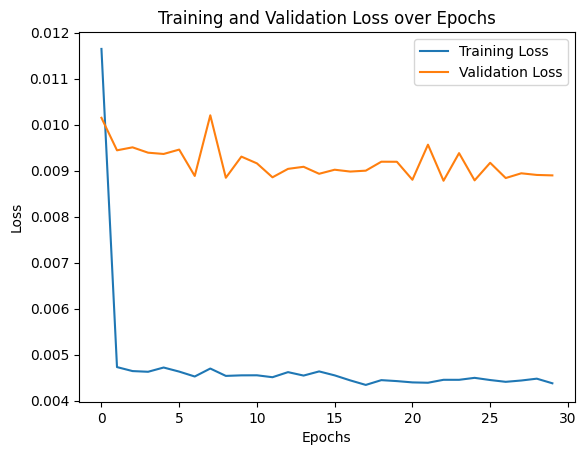

In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Activation
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

# Add the History callback to track training metrics
history = History()

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1, callbacks=[history])

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 1s 13ms/step
[0.5623851] [0.62207358]
[0.5594038] [0.53511706]
[0.5566825] [0.77591973]
[0.54930365] [0.70735786]
[0.5444378] [0.62876254]
[0.54274607] [0.5083612]
[0.5466056] [0.70735786]
[0.5454305] [0.50167224]
[0.5489071] [0.56187291]
[0.5516287] [0.61371237]


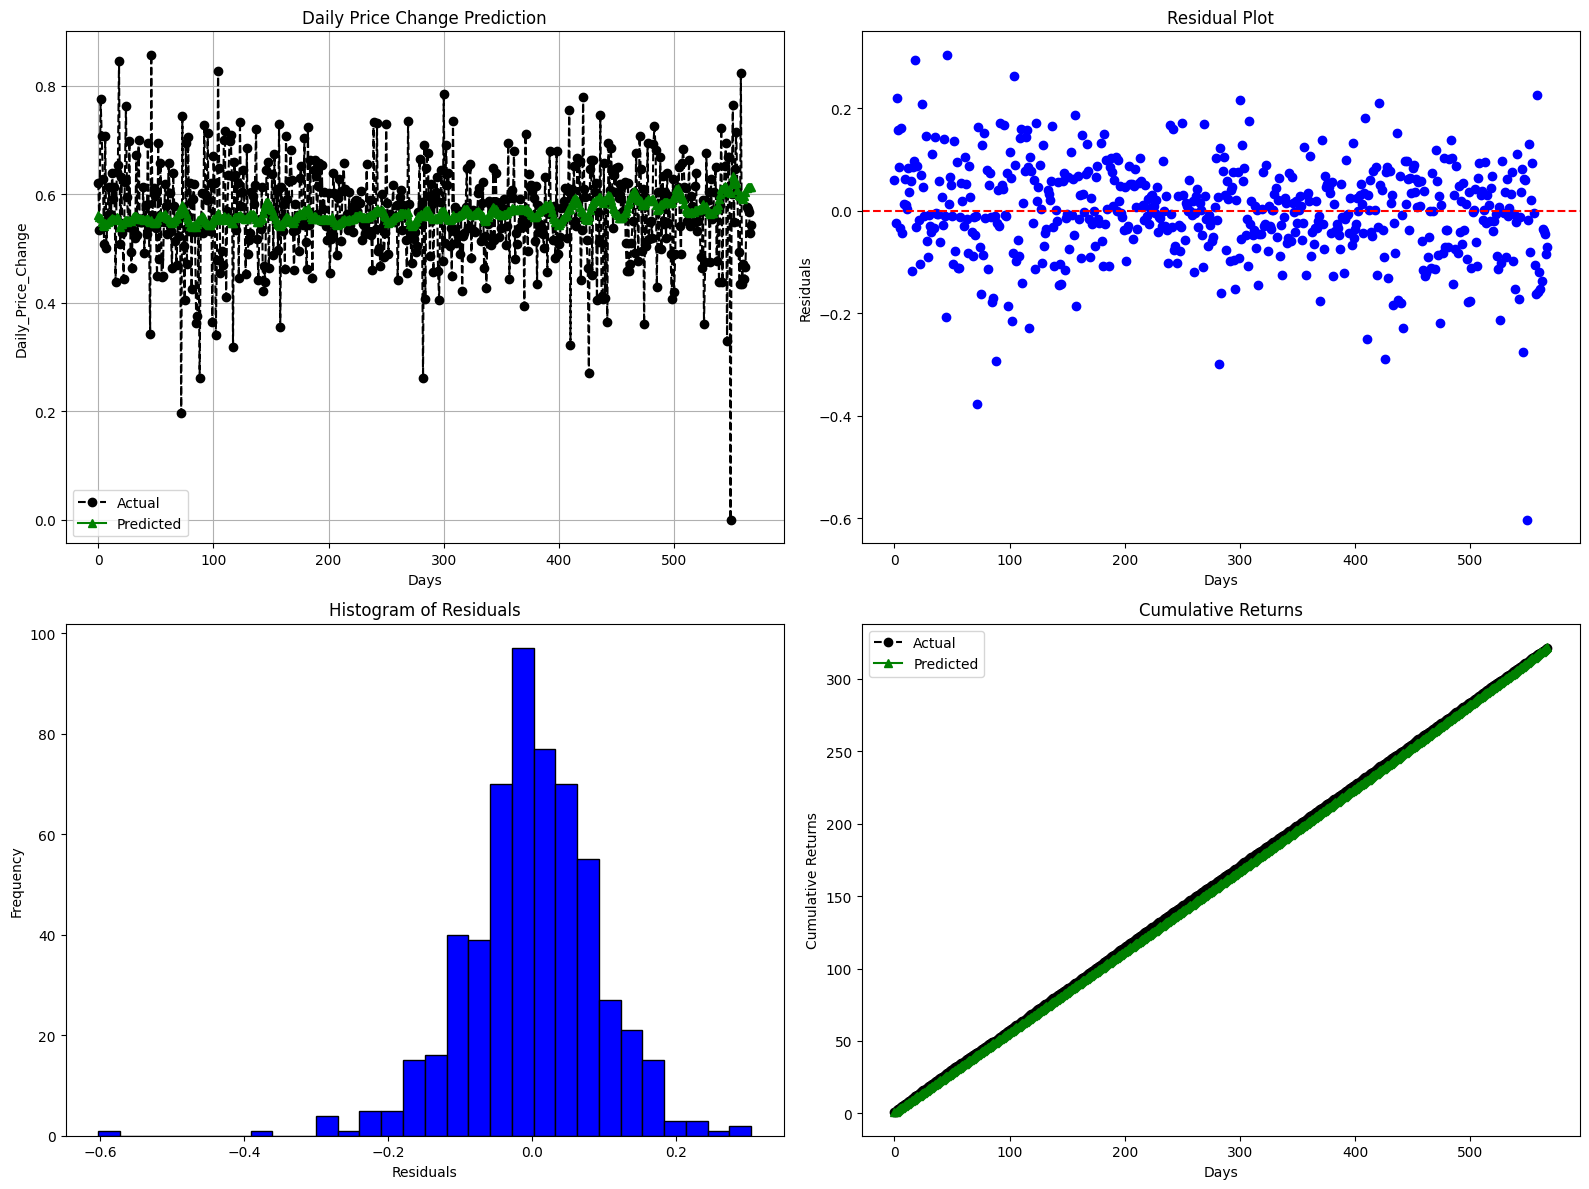

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_pred are NumPy arrays or lists
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

residuals = y_test - y_pred

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs. Predicted
axs[0, 0].plot(y_test, color='black', label='Actual', linestyle='--', marker='o')
axs[0, 0].plot(y_pred, color='green', label='Predicted', linestyle='-', marker='^')
axs[0, 0].set_title('Daily Price Change Prediction')
axs[0, 0].set_ylabel('Daily_Price_Change')
axs[0, 0].set_xlabel('Days')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Residual Plot
axs[0, 1].plot(residuals, color='blue', linestyle='', marker='o')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_title('Residual Plot')
axs[0, 1].set_xlabel('Days')
axs[0, 1].set_ylabel('Residuals')

# Plot 3: Histogram of Residuals
axs[1, 0].hist(residuals, bins=30, color='blue', edgecolor='black')
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Cumulative Returns
cumulative_returns_actual = np.cumsum(y_test)
cumulative_returns_pred = np.cumsum(y_pred)

axs[1, 1].plot(cumulative_returns_actual, label='Actual', color='black', linestyle='--', marker='o')
axs[1, 1].plot(cumulative_returns_pred, label='Predicted', color='green', linestyle='-', marker='^')
axs[1, 1].set_title('Cumulative Returns')
axs[1, 1].set_xlabel('Days')
axs[1, 1].set_ylabel('Cumulative Returns')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
